### Libraries

In [1]:
import os
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
print("pandas: {}".format(pd.__version__))
print("missingno: {}".format(msno.__version__))
print("seaborn: {}".format(sns.__version__))
print("numpy: {}".format(np.__version__))

pandas: 1.0.3
missingno: 0.4.2
seaborn: 0.10.0
numpy: 1.17.0


### Get the data!

Our dataset is available in Kaggle website (https://www.kaggle.com/c/titanic/)

The dataset is divide in 3 files
- **test.csv** - Will be used for test our ML algorithm
- **train.csv** - Will be used as a input for the algorithm
- **gender_submission.csv**

In [3]:
train_file = "dataset/train.csv"
test_file = "dataset/test.csv"
submission_file = "dataset/gender_submission.csv"

In [4]:
train = pd.read_csv(train_file, sep=",")
test = pd.read_csv(test_file, sep=",")
submission = pd.read_csv(submission_file, sep=",")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df = train.copy()

### Exploratory Data Analysis (EDA)

#### Now that we get our data, we will explore them getting some infomations

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing data

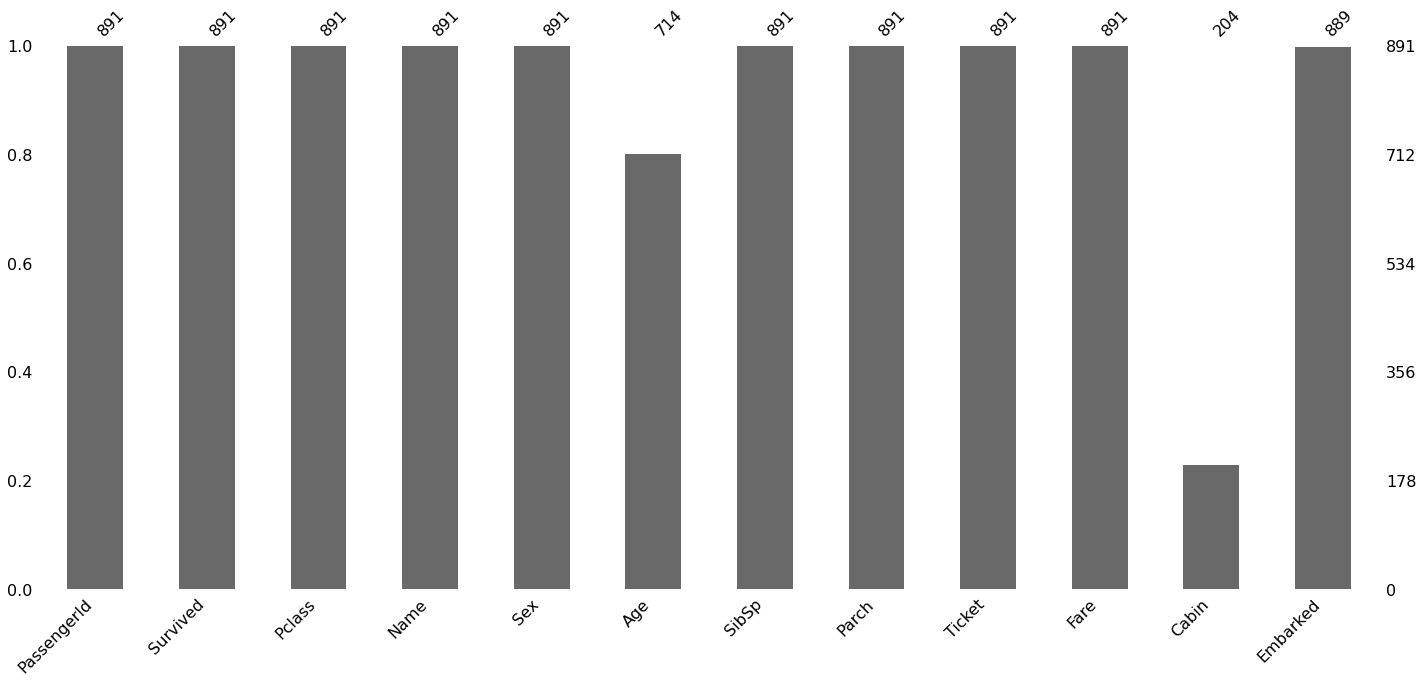

In [11]:
msno.bar(df) 

As you can see, there is about 20% of missing data in Age column and about 80% in Cabin column

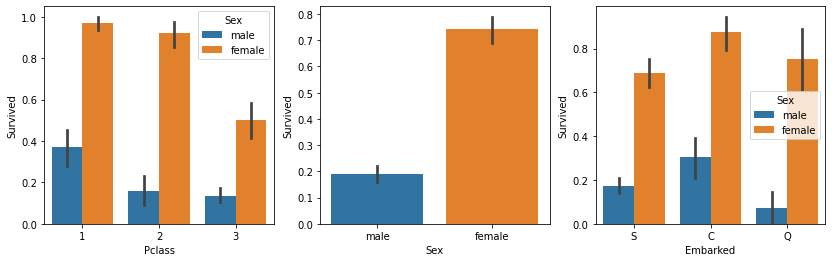

In [12]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", ax=axes[0])
sns.barplot(data=df, x="Sex", y="Survived", ax=axes[1])
sns.barplot(data=df, x="Embarked", y="Survived", hue="Sex", ax=axes[2])

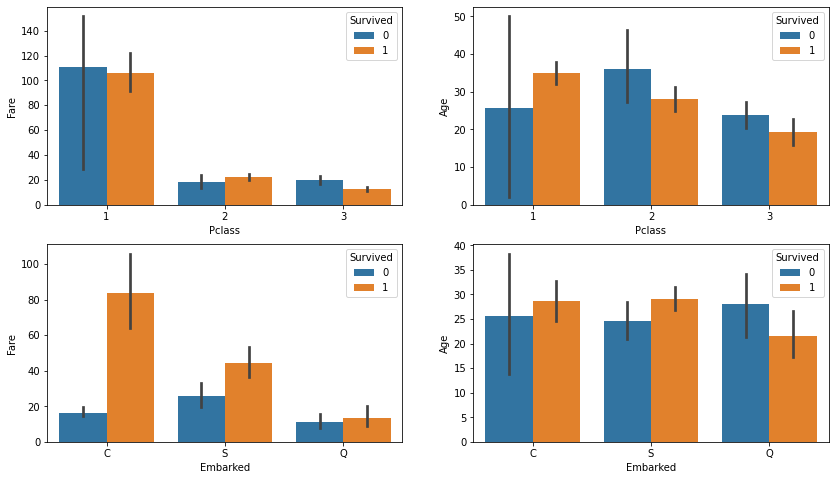

In [13]:
filter_female = df["Sex"] == "female"

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.barplot(data=df[filter_female], x="Pclass", y="Fare", hue="Survived", ax=axes[0][0])
sns.barplot(data=df[filter_female], x="Pclass", y="Age", hue="Survived", ax=axes[0][1])

sns.barplot(data=df[filter_female], x="Embarked", y="Fare", hue="Survived", ax=axes[1][0])
sns.barplot(data=df[filter_female], x="Embarked", y="Age", hue="Survived", ax=axes[1][1])

We found that female gender has a high probability of survival

#### Age Distribution by Pclass

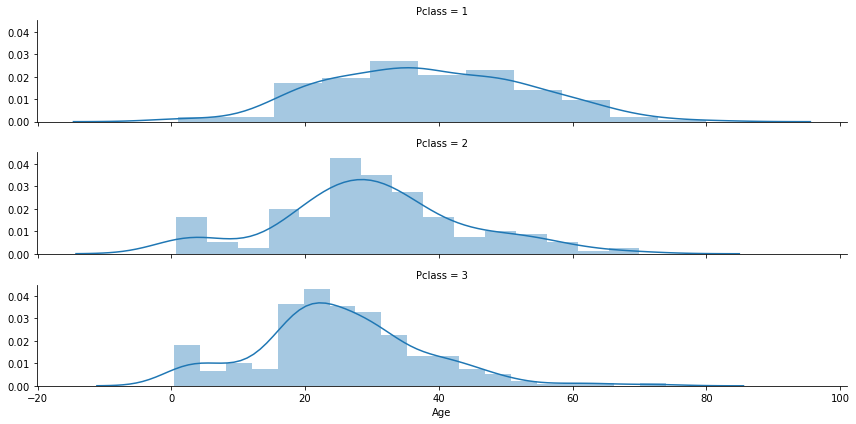

In [14]:
g = sns.FacetGrid(data=df, row="Pclass", height=2, aspect=6)
g.map(sns.distplot, "Age")

#### Detecting Outliers

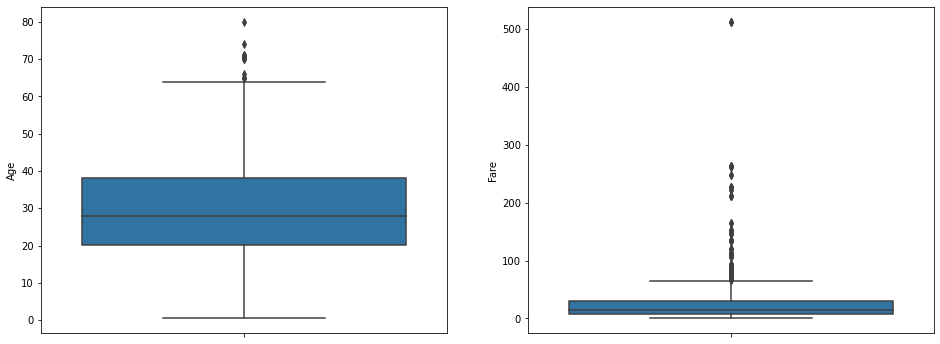

In [15]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(data=df, y="Age", ax=axes[0])
sns.boxplot(data=df, y="Fare", ax=axes[1])

Extracting title names

In [16]:
df["Title"] = df.apply(lambda x: x.Name[ x.Name.find(",") + 2 : x.Name.find(".") ], axis=1)
df.groupby("Title")["Title"].count().sort_values(ascending=False)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
Name: Title, dtype: int64

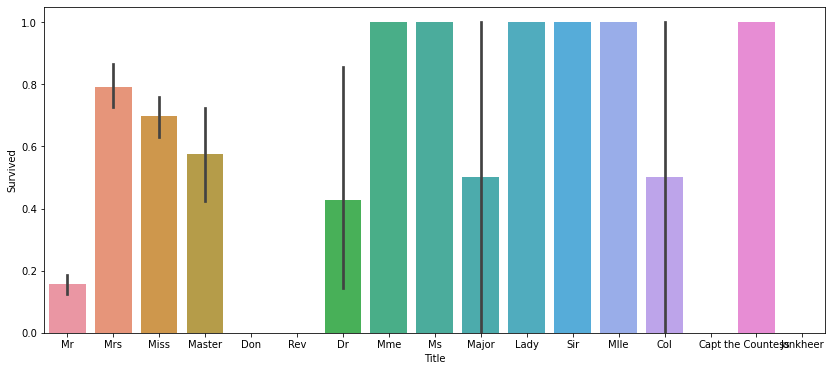

In [17]:
figure, axes = plt.subplots(figsize=(14, 6))

sns.barplot(data=df, x="Title", y="Survived")

Mr has less chances of surviving compare to Mrs, Miss and Master

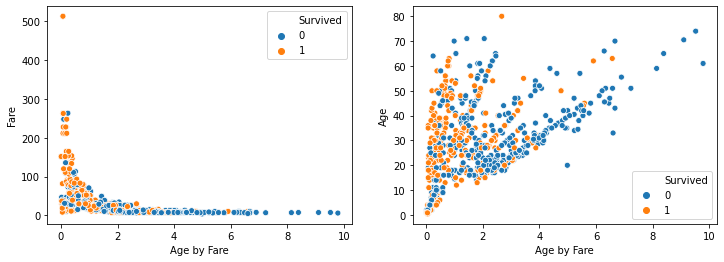

In [18]:
df["Age by Fare"] = df["Age"] / df["Fare"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.scatterplot(data=df, x="Age by Fare", y="Fare", hue="Survived", ax=axes[0])
sns.scatterplot(data=df, x="Age by Fare", y="Age", hue="Survived", ax=axes[1])

In [19]:
df.groupby("Parch")["Parch"].count().sort_values(ascending=False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
df.groupby("SibSp")["SibSp"].count().sort_values(ascending=False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
df["Has SibSp"] = df["SibSp"].apply(lambda x: 1 if x > 0 else 0)
df["Has Parch"] = df["Parch"].apply(lambda x: 1 if x > 0 else 0)

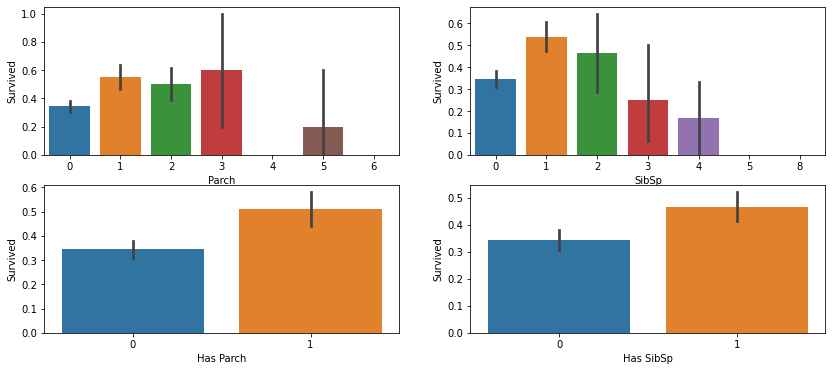

In [22]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

sns.barplot(data=df, x="Parch", y="Survived", ax=axes[0][0])
sns.barplot(data=df, x="SibSp", y="Survived", ax=axes[0][1])

sns.barplot(data=df, x="Has Parch", y="Survived", ax=axes[1][0])
sns.barplot(data=df, x="Has SibSp", y="Survived", ax=axes[1][1])

Highest SibSp has a lower probability of surviving

Having parents onboard increase chances to survive

Text(0.5, 1.0, 'Without Ouliers')

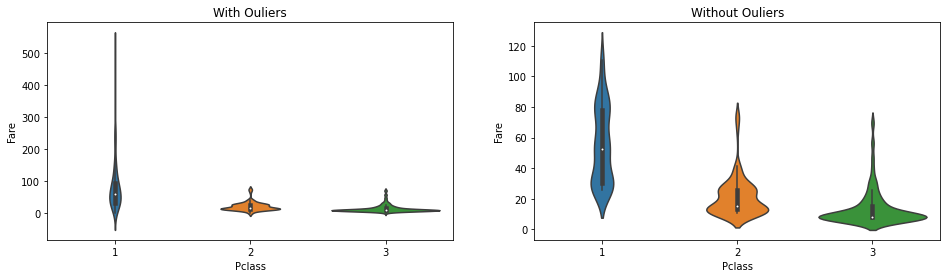

In [23]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

quartile = df["Fare"].quantile([0.02, 0.95])
df_violin = df[(df["Fare"] > quartile[0.02]) & (df["Fare"] < quartile[0.95])]

sns.violinplot(x="Pclass", y="Fare", data=df, ax=axes[0])
sns.violinplot(x="Pclass", y="Fare", data=df_violin, ax=axes[1])

axes[0].set_title("With Ouliers")
axes[1].set_title("Without Ouliers")

Creating some features

In [24]:
df["Fare by Pclass"] = df["Fare"] / df["Pclass"]
df["Pclass by Age"] = df["Pclass"] / df["Age"]

df["Alone"] = df.apply(lambda x: 1 if x["Parch"] == 0 and x["SibSp"] == 0 else 0, axis=1)

In [25]:
def age_classification(x):
    if x < 10:
        return 1
    elif x >= 10 and x < 20:
        return 2
    elif x >= 20 and x < 30:
        return 3
    elif x >= 30 and x < 40:
        return 4
    elif x >= 40 and x < 50:
        return 5
    else:
        return 6
    
df["Age Class"] = df["Age"].apply(lambda x: age_classification(x))

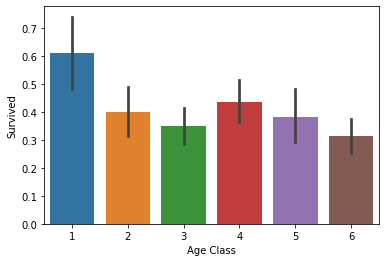

In [26]:
sns.barplot(data=df, x="Age Class", y="Survived")

Youngers Person has high probability of surviving

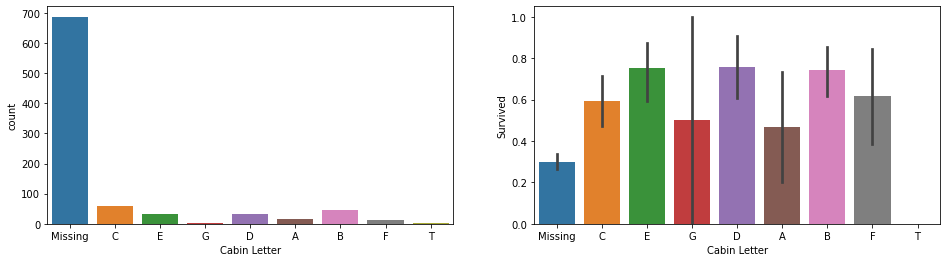

In [27]:
df["Cabin Letter"] = df["Cabin"].apply(lambda x: "Missing" if x is np.nan else x[0])

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

sns.countplot(data=df, x="Cabin Letter", ax=axes[0])
sns.barplot(data=df, x="Cabin Letter", y="Survived", ax=axes[1])

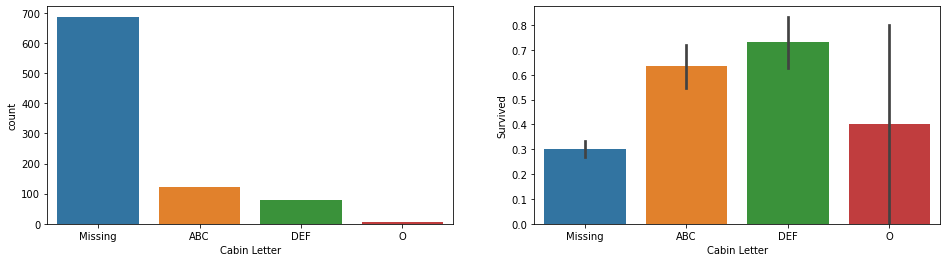

In [28]:
def cabin_classification(x):
    
    if x[0] in ['A', 'B', 'C']:
        return 'ABC'
    elif x[0] in ['D', 'E', 'F']:
        return 'DEF' 
    else:
        return "O"
    
df["Cabin Letter"] = df["Cabin Letter"].apply(lambda x: cabin_classification(x) if x != "Missing" else x)

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

sns.countplot(data=df, x="Cabin Letter", ax=axes[0])
sns.barplot(data=df, x="Cabin Letter", y="Survived", ax=axes[1])

Correlation

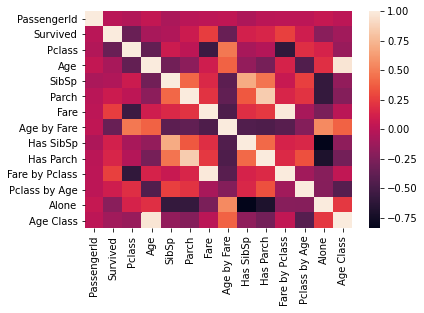

In [29]:
correlation = df.corr()
sns.heatmap(correlation)

In [30]:
correlation["Survived"].sort_values(ascending=False)

Survived          1.000000
Fare by Pclass    0.267627
Fare              0.257307
Has Parch         0.147408
Has SibSp         0.115867
Pclass by Age     0.101245
Parch             0.081629
PassengerId      -0.005007
SibSp            -0.035322
Age              -0.077221
Age Class        -0.106369
Alone            -0.203367
Pclass           -0.338481
Age by Fare      -0.346014
Name: Survived, dtype: float64

### Create a Pipeline to transform and fit our data before training

In [31]:
import sklearn

print("sklearn: ",sklearn.__version__)

sklearn:  0.23.2


In [32]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [33]:
class FeatureExtraction(BaseEstimator, TransformerMixin):
    def __init__(self, title_name=False, age_by_fare=False, has_sibsp=False, 
                 has_parch=False, fare_by_pclass=False, pclass_by_age=False, 
                 alone=False, age_class=False, cabin_class=False, columns_to_drop=[]):
        
        self.title_name = title_name
        self.age_by_fare = age_by_fare
        self.has_sibsp = has_sibsp
        self.has_parch = has_parch
        self.fare_by_pclass = fare_by_pclass
        self.pclass_by_age = pclass_by_age
        self.alone = alone
        self.age_class = age_class
        self.cabin_class = cabin_class
        self.columns_to_drop = columns_to_drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        dataframe = X.copy()
        if self.title_name:
            dataframe["Title"] = dataframe["Name"].apply(lambda x: x[ x.find(",") + 2 : x.find(".") ])
            dataframe.loc[~dataframe["Title"].isin(["Mr", "Miss", "Mrs", "Master"]), "Title"] = "Other"
        
        if self.age_by_fare:
            dataframe["Age"] = dataframe["Age"].fillna(dataframe["Age"].mean())
            dataframe["Age by Fare"] = dataframe["Age"] / dataframe["Fare"]
            
            dataframe = dataframe.replace(np.inf, 0)
            
        if self.has_sibsp:
            dataframe["Has SibSp"] = dataframe["SibSp"].apply(lambda x: 1 if x > 0 else 0)
        
        if self.has_parch:
            dataframe["Has Parch"] = dataframe["Parch"].apply(lambda x: 1 if x > 0 else 0)
        
        if self.fare_by_pclass:
            dataframe["Fare by Pclass"] = dataframe["Fare"] / dataframe["Pclass"]
            
        if self.pclass_by_age:
            dataframe["Pclass by Age"] = dataframe["Pclass"] / dataframe["Age"]
            
        if self.alone:
            dataframe["Alone"] = df.apply(lambda x: 1 if x["Parch"] == 0 and x["SibSp"] == 0 else 0, axis=1)
            
        if self.age_class:
            dataframe["Age Class"] = dataframe["Age"].apply(lambda x: self.age_classification(x))
        
        if self.cabin_class:
            dataframe["Cabin Letter"] = dataframe["Cabin"].apply(lambda x: "Missing" if x is np.nan else x[0])
            dataframe["Cabin Letter"] = dataframe["Cabin Letter"].apply(lambda x: self.cabin_classification(x) if x != "Missing" else x)
        
        if self.columns_to_drop:
            dataframe = dataframe.drop(self.columns_to_drop, axis=1)
        
        self.X = dataframe
        return dataframe
    
    def get_feature_names(self):
        return self.X.columns.tolist()
    
    def cabin_classification(self, x):
    
        if x[0] in ['A', 'B', 'C']:
            return 'ABC'
        elif x[0] in ['D', 'E', 'F']:
            return 'DEF' 
        else:
            return "O"
    
    def age_classification(self, x):
        if x < 10:
            return 1
        elif x >= 10 and x < 20:
            return 2
        elif x >= 20 and x < 30:
            return 3
        elif x >= 30 and x < 40:
            return 4
        elif x >= 40 and x < 50:
            return 5
        else:
            return 6

In [34]:
class DataFrameSelector(BaseEstimator, TransformerMixin):  
    def __init__(self, d_types):
        self.d_types = d_types
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X[ list(X.select_dtypes(self.d_types).columns) ]
        self.X = X
        
        return X
    
    def get_feature_names(self):
        return self.X.columns.tolist()

In [35]:
categorical_pipeline = Pipeline([
    ('df_selector', DataFrameSelector(d_types=["object"])),
    ('feature_extract', FeatureExtraction(title_name=True, cabin_class=True, columns_to_drop=["Name", "Ticket", "Cabin"])),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder())
])

In [36]:
numeric_pipeline = Pipeline([
    ('df_selector', DataFrameSelector(d_types=["int64", "float64"])),
    ('feature_extract', FeatureExtraction(age_by_fare=True, has_sibsp=True, has_parch=True, 
                                          fare_by_pclass=True, pclass_by_age=True, 
                                          alone=True, age_class=True, 
                                          columns_to_drop=["PassengerId", "Age", "Parch", "SibSp"])),
    ('imputer', SimpleImputer(strategy="mean")),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())

])

In [37]:
full_pipeline = FeatureUnion([
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

In [38]:
# Remove outlier
_train = train.copy()

quartile = _train["Fare"].quantile([0.02, 0.95])
train = train[(train["Fare"] > quartile[0.02]) & (train["Fare"] < quartile[0.95])]

X_train = full_pipeline.fit_transform(train.drop("Survived", axis=1))
y_train = train["Survived"]

X_test = full_pipeline.transform(test)
y_test = submission["Survived"]

### Now we choice a algorithms to classify our data

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [40]:
param_rforest = [
    {"n_estimators": [20, 50, 80, 100, 120, 150, 180, 200], "max_samples": [0.5, 0.8, None]}
]

param_knn = [
    {"n_neighbors": [3, 5, 8, 10, 15], "weights": ["uniform", "distance"], "p": [1, 2]}
]

param_lgr = [
    {"C": [0.5, 0.8, 1.0], "max_iter": [80, 100, 150]}
]

param_svm = [
    {"kernel": ["linear", "poly", "rbf", "sigmoid"], "gamma": ["scale", "auto"], "probability": [True]}
]

In [41]:
rforest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
lgr_model = LogisticRegression()
svm_model = SVC()

In [42]:
grid_rforest = GridSearchCV(rforest_model, param_rforest, cv=5)
grid_knn =  GridSearchCV(knn_model, param_knn, cv=5)
grid_lgr = GridSearchCV(lgr_model, param_lgr, cv=5)
grid_svm = GridSearchCV(svm_model, param_svm, cv=5)

In [43]:
%%time

grid_rforest.fit(X_train, y_train)

Wall time: 1min 11s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_samples': [0.5, 0.8, None],
                          'n_estimators': [20, 50, 80, 100, 120, 150, 180,
                                           200]}])

In [44]:
%%time

grid_knn.fit(X_train, y_train)

Wall time: 2.67 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 8, 10, 15], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}])

In [45]:
%%time

grid_lgr.fit(X_train, y_train)

D:\Anaconda\envs\classification\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Wall time: 2.44 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.5, 0.8, 1.0], 'max_iter': [80, 100, 150]}])

In [46]:
%%time

grid_svm.fit(X_train, y_train)

Wall time: 6.28 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'probability': [True]}])

In [47]:
print("Random Forest Best Estimator: ", grid_rforest.best_estimator_)
print("K-NN Best Estimator: ", grid_knn.best_estimator_)
print("Logistic Regression Best Estimator: ", grid_lgr.best_estimator_)
print("SVM Best Estimator: ", grid_svm.best_estimator_)

Random Forest Best Estimator:  RandomForestClassifier(max_samples=0.5, n_estimators=180)
K-NN Best Estimator:  KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
Logistic Regression Best Estimator:  LogisticRegression(C=0.8, max_iter=80)
SVM Best Estimator:  SVC(kernel='poly', probability=True)


### Performance validations

In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [49]:
def plot_confusion_matrix(models, X_train, y_train, labels=["Not died", "Died"]):
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(16, 4))
    
    for i, items in enumerate(models.items()):
        y_predict_cvp = cross_val_predict(items[1], X_train, y_train, cv=5)

        matrix = confusion_matrix(y_train, y_predict_cvp)
        sns.heatmap(matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels ,ax=axes[i])
        
        axes[i].title.set_text(items[0])
        
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Real")
    
        precision_recall(items[0], y_train, y_predict_cvp)
        
    plt.show()

In [50]:
def precision_recall_threshold(precisions, recalls, thresholds):
    fig, axes = plt.subplots(figsize=(12, 4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

In [51]:
def precision_recall(label, y_train, y_predict):
    precision = precision_score(y_train, y_predict)
    recall = recall_score(y_train, y_predict)
    f1 = f1_score(y_train, y_predict)
    print(" ************** {} **************".format(label))
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)
    print()

In [52]:
def plot_base_roc_curve():
    fig, axes = plt.subplots(figsize=(14, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rates")
    plt.ylabel("True Positive Rates")

In [53]:
def plot_roc_curve(models, X_train, y_train, method, cv=5):
    plot_base_roc_curve()
    
    for label, model in models.items():
        y_scores = cross_val_predict(model, X_train, y_train, cv=cv, method=method)
        
        fpr, tpr, threholds = roc_curve(y_train, y_scores[:, 1])
        auc_score = roc_auc_score(y_train, y_scores[:, 1])
        
        plt.plot(fpr, tpr, linewidth=2, label="{}: AUC: {}".format(label, round(auc_score, 2)))
        
        cvs = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
        print("({}) Cross Validation Scores: {}".format(label, cvs))
        print("({}) Cross Validation Mean: {}".format(label, np.mean(cvs)))
        print("({}) Cross Validation Standard Desviation: {}\n".format(label, np.std(cvs)))
        
    plt.legend(loc="lower right")
    plt.show()

(Random Forest) Cross Validation Scores: [0.81927711 0.79518072 0.85542169 0.76969697 0.86060606]
(Random Forest) Cross Validation Mean: 0.8200365096750639
(Random Forest) Cross Validation Standard Desviation: 0.03478636322248225

(KNN) Cross Validation Scores: [0.78915663 0.78313253 0.80120482 0.73939394 0.82424242]
(KNN) Cross Validation Mean: 0.7874260679079956
(KNN) Cross Validation Standard Desviation: 0.02783455676823427

(Logistic Regresion) Cross Validation Scores: [0.77108434 0.78313253 0.80722892 0.78181818 0.86060606]
(Logistic Regresion) Cross Validation Mean: 0.8007740051113545
(Logistic Regresion) Cross Validation Standard Desviation: 0.03216694571555645

(SVM) Cross Validation Scores: [0.8253012  0.79518072 0.8373494  0.78787879 0.83636364]
(SVM) Cross Validation Mean: 0.8164147499087259
(SVM) Cross Validation Standard Desviation: 0.02088239285887471



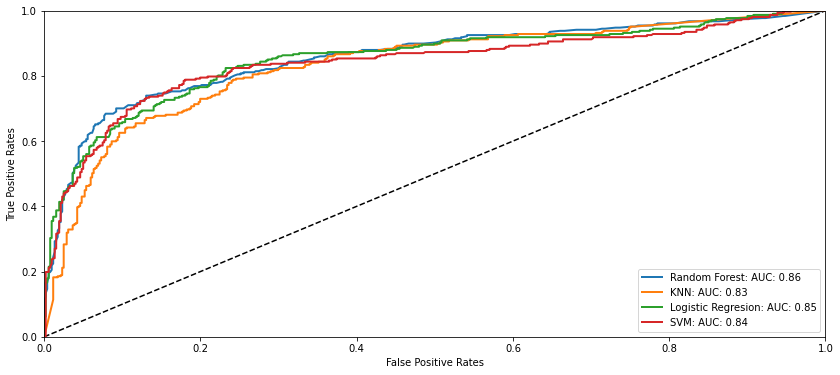

In [54]:
plot_roc_curve({
    "Random Forest": grid_rforest.best_estimator_,
    "KNN": grid_knn.best_estimator_,
    "Logistic Regresion": grid_lgr.best_estimator_,
    "SVM": grid_svm.best_estimator_
}, X_train, y_train, method="predict_proba", cv=5)

 ************** Random Forest **************
Precision:  0.7809187279151943
Recall:  0.7198697068403909
F1 Score:  0.7491525423728813

 ************** KNN **************
Precision:  0.7298245614035088
Recall:  0.6775244299674267
F1 Score:  0.7027027027027027

 ************** Logistic Regresion **************
Precision:  0.7350993377483444
Recall:  0.7231270358306189
F1 Score:  0.7290640394088671

 ************** SVM **************
Precision:  0.7992277992277992
Recall:  0.6742671009771987
F1 Score:  0.7314487632508835



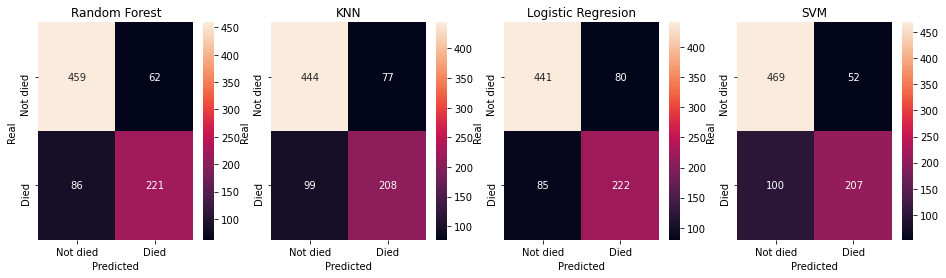

In [55]:
plot_confusion_matrix({
    "Random Forest": grid_rforest.best_estimator_,
    "KNN": grid_knn.best_estimator_,
    "Logistic Regresion": grid_lgr.best_estimator_,
    "SVM": grid_svm.best_estimator_
}, X_train, y_train, labels=["Not died", "Died"])

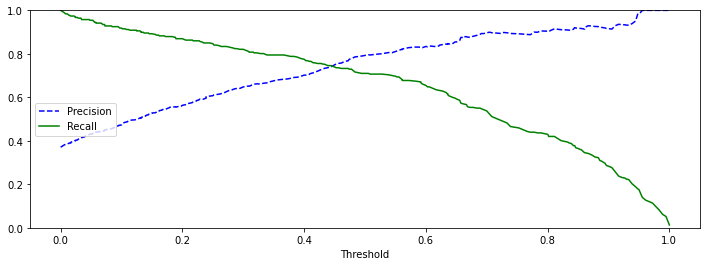

In [56]:
y_predict_cvp_decision = cross_val_predict(grid_rforest.best_estimator_, X_train, y_train, cv=5, method="predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_predict_cvp_decision[:, 1])

precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

### Predictions

 ************** Random Forest **************
Precision:  0.8222222222222222
Recall:  0.7302631578947368
F1 Score:  0.7735191637630661

Score:  0.9444444444444444
Accuracy:  0.8444976076555024


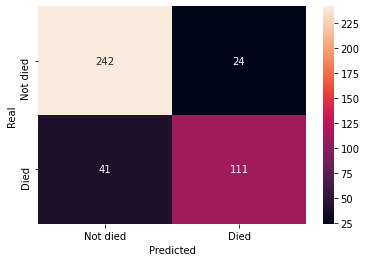

In [57]:
predict = grid_rforest.best_estimator_.predict(X_test)
score = grid_rforest.best_estimator_.score(X_train, y_train)

fig, axes = plt.subplots()

matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, annot=True, fmt="d", xticklabels=["Not died", "Died"], yticklabels=["Not died", "Died"])

axes.set_xlabel("Predicted")
axes.set_ylabel("Real")

precision_recall("Random Forest", y_test, predict)
print("Score: ",score)
print("Accuracy: ",accuracy_score(y_test, predict))

#print("Precision: ",precision_score(y_test, predict))
#print("Recall: ",recall_score(y_test, predict))
#print("F1: ",f1_score(y_test, predict))

Not bad, around 84% accuracy :)

In [58]:
feature_importance = grid_rforest.best_estimator_.feature_importances_
feature_importance

array([0.05243456, 0.10572128, 0.14347332, 0.01479806, 0.01312218,
       0.12356365, 0.1193436 , 0.01292465, 0.04215767, 0.08466714,
       0.07379903, 0.01405935, 0.00875968, 0.01557059, 0.00685761,
       0.01328375, 0.08362517, 0.02312173, 0.00434779, 0.00750148,
       0.01386438, 0.02177662, 0.00122669])

In [59]:
numeric_features = full_pipeline.get_params()["transformer_list"][0][1][1].get_feature_names()

In [60]:
categorical_features = full_pipeline.get_params()["transformer_list"][1][1][3].get_feature_names().tolist()

In [61]:
features = numeric_features + categorical_features

In [62]:
sorted(zip(feature_importance, features), reverse=True)

[(0.14347331885542483, 'Age by Fare'),
 (0.12356365307088608, 'Fare by Pclass'),
 (0.11934360178255629, 'Pclass by Age'),
 (0.10572128330008464, 'Fare'),
 (0.08466713769803658, 'x0_female'),
 (0.08362516989370668, 'x2_Mr'),
 (0.07379903339857534, 'x0_male'),
 (0.05243456146665934, 'Pclass'),
 (0.0421576709119963, 'Age Class'),
 (0.023121734812688147, 'x2_Mrs'),
 (0.021776622666126226, 'x3_Missing'),
 (0.015570587326982388, 'x1_S'),
 (0.014798064653377595, 'Has SibSp'),
 (0.014059354830232044, 'x1_C'),
 (0.013864380755866558, 'x3_DEF'),
 (0.013283746388094144, 'x2_Miss'),
 (0.013122177163192797, 'Has Parch'),
 (0.01292465075103765, 'Alone'),
 (0.008759680602110187, 'x1_Q'),
 (0.007501482292901819, 'x3_ABC'),
 (0.006857607199492654, 'x2_Master'),
 (0.004347789925605722, 'x2_Other'),
 (0.001226690254366048, 'x3_O')]

### Final Observations

    - Exploratory Data Analysis
          Female has high probability os surviving compare to Male
          Highest SibSp has a lower probability of surviving
          Having parents onboard increase chances to 
          Youngers Person has high probability of surviving
          Fare and Pclass has a high correlation with Survived
          
    - Feature Extraction
          Age by Fare, Pclass by Age, Fare by Pclass and Fare features increase performance of our model
          Has Parch and Has SibSp is more correlated than Parch and SibSp features alone, same to Age Class and Age
          Cabin seems having no effect in feature importances of our model
    
    - Model
          Random Forest show the best result against others algorithms
          We could use more hyper parameters in Logistic Regression or SVM, they seems promissors
          Our precision, recall and f1 score is okay
          Around 84% Accuracy is a great result, the best score found in Kaggle is round 85%
          

In [67]:
test["Survived"] = predict

In [68]:
df_submission = test[["PassengerId", "Survived"]]

In [69]:
df_submission.to_csv("submission_kaggle.csv", index=False)